<a href="https://colab.research.google.com/github/elimeyer1/ML_4105/blob/main/Homework6_Question1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/4105/Housing.csv'
housing = pd.read_csv(file_path)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def redefine(x):
    return x.map({'yes': 1, 'no': 0})

In [ ]:
housing[varlist] = housing[varlist].apply(redefine)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
x = housing[['area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'parking']].values
y = housing['price'].values

In [ ]:
housing=housing[['price','area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'parking']].values

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
class MultiLayerHousingNetwork(nn.Module):
    def __init__(self, input_dim, hidden_layers):
        super(MultiLayerHousingNetwork, self).__init__()

        layers = []
        current_dim = input_dim


        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(current_dim, hidden_dim))
            layers.append(nn.ReLU())

            layers.append(nn.Dropout(0.2))
            current_dim = hidden_dim

        layers.append(nn.Linear(current_dim, 1))


        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [ ]:
epochs = 500
learning_rate = 0.001
hidden_layers = [8,16,16]

In [ ]:
model = MultiLayerHousingNetwork(
    input_dim=x_train.shape[1],
    hidden_layers=hidden_layers
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
start_time = time.time()

In [ ]:
train_losses = []
for epoch in range(epochs):

    outputs = model(x_train)
    loss = criterion(outputs, y_train)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    train_losses.append(loss.item())


    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([436])) that is different to the input size (torch.Size([436, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0/500], Loss: 25235438960640.0000
Epoch [100/500], Loss: 25206953345024.0000
Epoch [200/500], Loss: 24621434798080.0000
Epoch [300/500], Loss: 21577257189376.0000
Epoch [400/500], Loss: 15110168903680.0000


In [ ]:
training_time = time.time() - start_time

In [ ]:
model.eval()
with torch.no_grad():
    val_predictions = model(x_val)
    val_loss = criterion(val_predictions, y_val)


    val_pred_np = val_predictions.numpy()
    val_true_np = y_val.numpy()


    mse = mean_squared_error(val_true_np, val_pred_np)
    mae = mean_absolute_error(val_true_np, val_pred_np)
    r2 = r2_score(val_true_np, val_pred_np)

print('model', model)
print('training_time', training_time)
print('final_train_loss', train_losses[-1])
print('validation_mse', mse)
print('validation_mae', mae)
print('validation_r2', r2)
print('training_losses', train_losses)

model MultiLayerHousingNetwork(
  (network): Sequential(
    (0): Linear(in_features=11, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=8, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=16, out_features=1, bias=True)
  )
)
training_time 3.06976318359375
final_train_loss 9193661661184.0
validation_mse 8619840000000.0
validation_mae 2354166.5
validation_r2 -0.7053556442260742
training_losses [25235438960640.0, 25235428474880.0, 25235390726144.0, 25235352977408.0, 25235287965696.0, 25235264897024.0, 25235218759680.0, 25235208273920.0, 25235126484992.0, 25235103416320.0, 25235027918848.0, 25234965004288.0, 25235002753024.0, 25234929352704.0, 25234868535296.0, 25234826592256.0, 25234751094784.0, 25234728026112.0, 25234704957440.0, 25234652528640.0, 2523

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


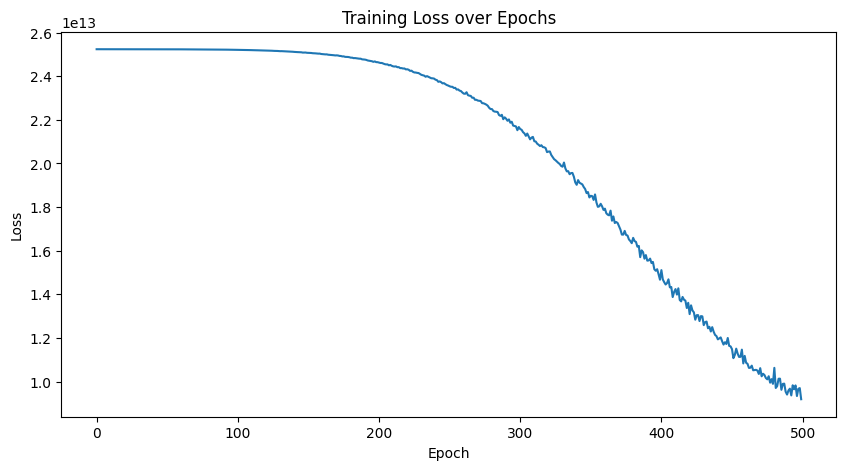

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()